In [ ]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary
import pydotplus
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

## 1. 전처리 및 train set, test set 생성

In [ ]:
# train set으로 쓰일 시,도별 + 경기도 데이터 셋

sido = pd.read_csv("./final_dataset/지역명_사망자수(train).csv")
sido = sido.drop(columns=['Unnamed: 0'])
sido.head()

,지역명,병원수,격리병상수,남은 격리병상수,총인구,요양기관수,60세 이상 - 계,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상,확진자수,사망자수
0,강원도,18.0,539.0,75.0,1347375.0,34.0,369970,116558,81374,56864,53119,38211,23844,440985.0,746
1,경상남도,35.0,940.0,176.0,3295942.0,129.0,774696,253193,179622,128375,99667,70217,43622,1052389.0,1134
2,경상북도,29.0,1046.0,271.0,2583157.0,111.0,719154,213011,162533,119640,100383,75400,48187,731978.0,1203
3,광주광역시,19.0,240.0,55.0,1477573.0,60.0,290547,96662,65287,52134,38610,23826,14028,518968.0,520
4,대구광역시,18.0,876.0,249.0,2410700.0,75.0,559877,182705,133421,95965,73211,47435,27140,734292.0,1243


In [ ]:
sido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   loc         46 non-null     object 
 1   cnt_hos     46 non-null     float64
 2   bed         46 non-null     float64
 3   remain_bed  46 non-null     float64
 4   pop         46 non-null     float64
 5   nurse       46 non-null     float64
 6   total60     46 non-null     int64  
 7   60-64       46 non-null     int64  
 8   65-69       46 non-null     int64  
 9   70-74       46 non-null     int64  
 10  75-79       46 non-null     int64  
 11  80-84       46 non-null     int64  
 12  85-         46 non-null     int64  
 13  conf        46 non-null     float64
 14  death       46 non-null     int64  
dtypes: float64(6), int64(8), object(1)
memory usage: 5.5+ KB


In [ ]:
columns = ['loc','cnt_hos','bed','remain_bed','pop','nurse','total60','60-64','65-69','70-74','75-79','80-84','85-','conf','death']
var_name = pd.DataFrame(sido.columns, columns, columns=['meaning'])
var_name

,meaning
loc,지역명
cnt_hos,병원수
bed,격리병상수
remain_bed,남은 격리병상수
pop,총인구
nurse,요양기관수
total60,60세 이상 - 계
60-64,60~64세
65-69,65~69세
70-74,70~74세


In [ ]:
sido.columns = columns
sido.head()

,loc,cnt_hos,bed,remain_bed,pop,nurse,total60,60-64,65-69,70-74,75-79,80-84,85-,conf,death
0,강원도,18.0,539.0,75.0,1347375.0,34.0,369970,116558,81374,56864,53119,38211,23844,440985.0,746
1,경상남도,35.0,940.0,176.0,3295942.0,129.0,774696,253193,179622,128375,99667,70217,43622,1052389.0,1134
2,경상북도,29.0,1046.0,271.0,2583157.0,111.0,719154,213011,162533,119640,100383,75400,48187,731978.0,1203
3,광주광역시,19.0,240.0,55.0,1477573.0,60.0,290547,96662,65287,52134,38610,23826,14028,518968.0,520
4,대구광역시,18.0,876.0,249.0,2410700.0,75.0,559877,182705,133421,95965,73211,47435,27140,734292.0,1243


In [ ]:
x = sido.drop(columns=['loc','death'])
y = sido['death']
train_x, valid_x, train_y, valid_y = train_test_split(x,y,test_size=0.3,random_state=1)

# scaled version

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
columns_ = ['cnt_hos','bed','remain_bed','pop','nurse','total60','60-64','65-69','70-74','75-79','80-84','85-','conf','death']
scaler = StandardScaler()
sido_scale = scaler.fit_transform(sido.drop(columns=['loc']))
sc_sido_df = pd.DataFrame(sido_scale, columns = columns_)
sc_sido_df.head()

,cnt_hos,bed,remain_bed,pop,nurse,total60,60-64,65-69,70-74,75-79,80-84,85-,conf,death
0,0.875868,0.652523,0.215780,0.167566,0.054476,0.363549,0.338061,0.311484,0.247297,0.449119,0.564159,0.573190,0.126530,0.348097
1,2.428993,1.634047,1.448883,1.477850,2.483661,1.533694,1.582722,1.518238,1.405957,1.449702,1.645108,1.662017,1.287472,0.879609
2,1.880831,1.893503,2.608733,0.998549,2.023394,1.373111,1.216689,1.308338,1.264428,1.465093,1.820156,1.913332,0.679071,0.974131
3,0.967228,-0.079337,-0.028399,0.255115,0.719305,0.133920,0.156820,0.113891,0.170659,0.137238,0.078330,0.032795,0.274605,0.038505
4,0.875868,1.477395,2.340136,0.882583,1.102861,0.912608,0.940619,0.950763,0.880833,0.881011,0.875684,0.754642,0.683465,1.028926


In [ ]:
sc_x = sc_sido_df.drop(columns=['death'])
sc_y = sc_sido_df['death']
train_sc_x, valid_sc_x, train_sc_y, valid_sc_y = train_test_split(sc_x,sc_y,test_size=0.3,random_state=1)

<AxesSubplot:>

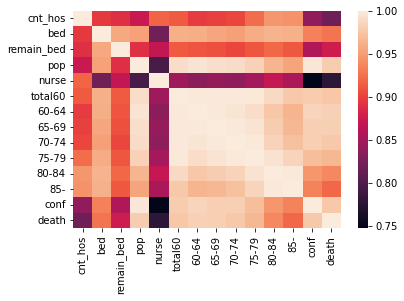

In [ ]:
# ++ 이건 걍 내가 변수 관계 확인 위해서..

import seaborn as sns
corr = sido.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

## 2. 모델 fit, 성능 확인 

#### 모델 적용

In [ ]:
rf = RandomForestRegressor(n_estimators=500, random_state=1) # n_estimators=500
rf.fit(train_x, train_y)

RandomForestRegressor(n_estimators=500, random_state=1)

#### 변수 중요도 확인 

In [ ]:
# variable (feature) importance plot

importances = rf.feature_importances_
# rf.estimators_ : random forest로 구한 나무 모델 500개. 
df = pd.DataFrame({'Feature':train_x.columns, 'importance':importances})
df = df.sort_values('importance')
print(df)

       Feature  importance
4        nurse    0.029545
0      cnt_hos    0.053002
12        conf    0.062124
3          pop    0.065540
10       80-84    0.069121
8        70-74    0.077000
7        65-69    0.078057
5      total60    0.081437
2   remain_bed    0.082119
9        75-79    0.088825
11         85-    0.093660
6        60-64    0.096229
1          bed    0.123340


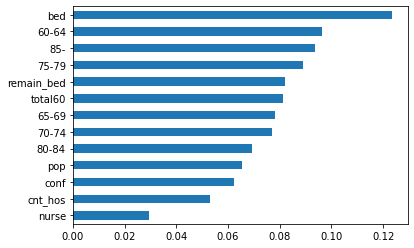

In [ ]:
ax = df.plot(kind='barh',x='Feature',y='importance', legend=False)
# barh : 가로막대플롯
ax.set_ylabel('')
plt.show()

#### 성능 확인

In [ ]:
# train set
regressionSummary(train_y, rf.predict(train_x))


Regression statistics

                      Mean Error (ME) : 31.6892
       Root Mean Squared Error (RMSE) : 206.5119
            Mean Absolute Error (MAE) : 84.1689
          Mean Percentage Error (MPE) : -11.7096
Mean Absolute Percentage Error (MAPE) : 21.4247


In [ ]:
# valid set
regressionSummary(valid_y, rf.predict(valid_x))


Regression statistics

                      Mean Error (ME) : 9.7511
       Root Mean Squared Error (RMSE) : 60.3679
            Mean Absolute Error (MAE) : 50.2000
          Mean Percentage Error (MPE) : -4.1734
Mean Absolute Percentage Error (MAPE) : 35.7253


In [ ]:
# boxplot
pred_error_train = pd.DataFrame({ 'residual' : train_y - rf.predict(train_x),
                                  'data set' : 'training'})
pred_error_valid = pd.DataFrame({ 'residual' : valid_y - rf.predict(valid_x),
                                  'data set' : 'validation'})
boxdata_df = pred_error_train.append(pred_error_valid, ignore_index = True)
boxdata_df.tail()

,residual,data set
41,14.042,validation
42,-31.464,validation
43,-38.636,validation
44,85.172,validation
45,-10.050,validation


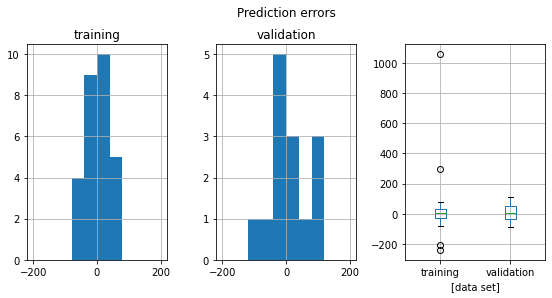

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(9,4)
common = {'bins':10, 'range':[-200, 200]} #
pred_error_train.hist(ax=axes[0], **common)
pred_error_valid.hist(ax=axes[1], **common)
boxdata_df.boxplot(ax=axes[2], by='data set')

axes[0].set_title('training')
axes[1].set_title('validation')
axes[2].set_title('')

plt.suptitle('Prediction errors')
plt.subplots_adjust(bottom=0.1, top=0.85, wspace=0.35)
plt.show()

## 검증데이터로 했을때 이상치는 없고 [-100,100]사이의 오차를 가짐. 특히 [-50,50]사이의 오차가 가장 많다.

## scaled version

In [ ]:
sc_rf = RandomForestRegressor(n_estimators=500, random_state=1) # n_estimators=500
sc_rf.fit(train_sc_x, train_sc_y)

RandomForestRegressor(n_estimators=500, random_state=1)

       Feature  importance
4        nurse    0.028845
12        conf    0.052285
3          pop    0.055620
5      total60    0.063777
9        75-79    0.064327
10       80-84    0.064874
7        65-69    0.070770
0      cnt_hos    0.079098
8        70-74    0.085848
11         85-    0.090432
6        60-64    0.097389
2   remain_bed    0.104352
1          bed    0.142385


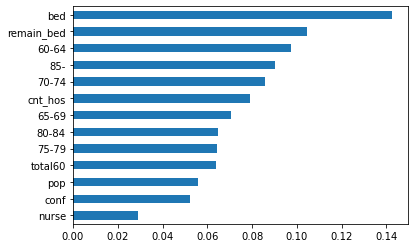

In [ ]:
# variable (feature) importance plot

importances = sc_rf.feature_importances_
# rf.estimators_ : random forest로 구한 나무 모델 500개. 
df = pd.DataFrame({'Feature':train_sc_x.columns, 'importance':importances})
df = df.sort_values('importance')
print(df)
ax = df.plot(kind='barh',x='Feature',y='importance', legend=False)
# barh : 가로막대플롯
ax.set_ylabel('')
plt.show()

In [ ]:
print("train set")
regressionSummary(train_sc_y, sc_rf.predict(train_sc_x))
print("valid set")
regressionSummary(train_sc_y, sc_rf.predict(train_sc_x))

train set

Regression statistics

                      Mean Error (ME) : 0.0441
       Root Mean Squared Error (RMSE) : 0.2871
            Mean Absolute Error (MAE) : 0.1174
          Mean Percentage Error (MPE) : 16.0939
Mean Absolute Percentage Error (MAPE) : 25.2865
valid set

Regression statistics

                      Mean Error (ME) : 0.0441
       Root Mean Squared Error (RMSE) : 0.2871
            Mean Absolute Error (MAE) : 0.1174
          Mean Percentage Error (MPE) : 16.0939
Mean Absolute Percentage Error (MAPE) : 25.2865


#### 파라미터 조정

In [ ]:
# 가장 중요한 max_features, n_estimators만 조정... 관측수가 하도 적어서 다른건 조정해도 크게 효과 없을듯

Storng law of large numbers를 만족 시키기 위해 2000개 이상의 tree 필요  
노드 분할 시 무작위로 선택되는 변수의 수 > Regression = 변수의 수 / 3  
참고 https://youtu.be/lIT5-piVtRw   

In [ ]:
# max_features = 12 / 3 = 4 로 두고...
# n_estimators만 2000이상으로 조정해보기

# n_estimators = 2000
rf_selected = RandomForestRegressor(max_features=4, n_estimators=2000, random_state=1) # n_estimators=500
rf_selected.fit(train_x, train_y)
regressionSummary(train_y, rf_selected.predict(train_x))
regressionSummary(valid_y, rf_selected.predict(valid_x))


Regression statistics

                      Mean Error (ME) : 32.5322
       Root Mean Squared Error (RMSE) : 199.9164
            Mean Absolute Error (MAE) : 84.4587
          Mean Percentage Error (MPE) : -10.7162
Mean Absolute Percentage Error (MAPE) : 20.7263

Regression statistics

                      Mean Error (ME) : 7.9701
       Root Mean Squared Error (RMSE) : 57.9226
            Mean Absolute Error (MAE) : 46.2491
          Mean Percentage Error (MPE) : -3.9702
Mean Absolute Percentage Error (MAPE) : 33.0985


In [ ]:
# n_estimators = 2500
rf_selected2 = RandomForestRegressor(max_features=4, n_estimators=2500, random_state=1) # n_estimators=500
rf_selected2.fit(train_x, train_y)
regressionSummary(train_y, rf_selected2.predict(train_x))
regressionSummary(valid_y, rf_selected2.predict(valid_x))


Regression statistics

                      Mean Error (ME) : 33.5255
       Root Mean Squared Error (RMSE) : 205.1443
            Mean Absolute Error (MAE) : 85.6577
          Mean Percentage Error (MPE) : -10.7070
Mean Absolute Percentage Error (MAPE) : 20.8451

Regression statistics

                      Mean Error (ME) : 7.7695
       Root Mean Squared Error (RMSE) : 58.4235
            Mean Absolute Error (MAE) : 46.7045
          Mean Percentage Error (MPE) : -4.0629
Mean Absolute Percentage Error (MAPE) : 33.2903


In [ ]:
# n_estimators = 3000
rf_selected3 = RandomForestRegressor(max_features=4, n_estimators=3000, random_state=1) # n_estimators=500
rf_selected3.fit(train_x, train_y)
regressionSummary(train_y, rf_selected3.predict(train_x))
regressionSummary(valid_y, rf_selected3.predict(valid_x))


Regression statistics

                      Mean Error (ME) : 33.2521
       Root Mean Squared Error (RMSE) : 204.7594
            Mean Absolute Error (MAE) : 85.5716
          Mean Percentage Error (MPE) : -10.7156
Mean Absolute Percentage Error (MAPE) : 20.8606

Regression statistics

                      Mean Error (ME) : 7.8525
       Root Mean Squared Error (RMSE) : 58.6949
            Mean Absolute Error (MAE) : 46.9435
          Mean Percentage Error (MPE) : -3.9385
Mean Absolute Percentage Error (MAPE) : 33.2892


In [ ]:
# max_features도 조정해보기

# < grid search >
param_grid = {
    'n_estimators' : [500, 800, 1000, 1200],
    'max_features' : [2,3,4,5,6,7,8,9,10]
}
gridSearch = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_x, train_y)
print('Improved parameters : ', gridSearch.best_params_)

regTree = gridSearch.best_estimator_
regressionSummary(train_y, regTree.predict(train_x))
regressionSummary(valid_y, regTree.predict(valid_x))

Improved parameters :  {'max_features': 6, 'n_estimators': 800}

Regression statistics

                      Mean Error (ME) : 31.2591
       Root Mean Squared Error (RMSE) : 196.8554
            Mean Absolute Error (MAE) : 82.8273
          Mean Percentage Error (MPE) : -10.1690
Mean Absolute Percentage Error (MAPE) : 20.1370

Regression statistics

                      Mean Error (ME) : 9.9521
       Root Mean Squared Error (RMSE) : 58.4443
            Mean Absolute Error (MAE) : 47.2120
          Mean Percentage Error (MPE) : -2.1449
Mean Absolute Percentage Error (MAPE) : 32.5570


       Feature  importance
4        nurse    0.028881
0      cnt_hos    0.051337
11         85-    0.073651
3          pop    0.074724
10       80-84    0.074843
9        75-79    0.077338
12        conf    0.077340
1          bed    0.079730
2   remain_bed    0.082025
8        70-74    0.083456
5      total60    0.094884
7        65-69    0.100348
6        60-64    0.101441


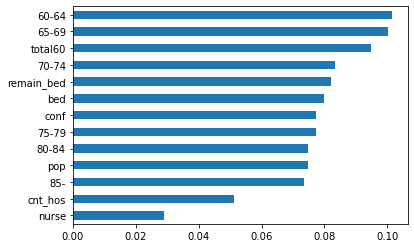

In [ ]:
importances = rf_selected.feature_importances_
# rf.estimators_ : random forest로 구한 나무 모델 500개. 
df = pd.DataFrame({'Feature':train_x.columns, 'importance':importances})
df = df.sort_values('importance')
print(df)
ax = df.plot(kind='barh',x='Feature',y='importance', legend=False)
# barh : 가로막대플롯
ax.set_ylabel('')
plt.show()

In [ ]:
# 음 다들 딱히 맨 앞에 만든 모델이랑 파라미터 값도 크게 차이 안 나고... 대부분 오히려 성능떨어짐 ... 
# 걍 맨처음 'rf'모델 사용하장

## GradientBoosting

In [ ]:
# randomforest보다 ㅂㄹㅂㄹ
boost = GradientBoostingRegressor(n_estimators=1000)
boost.fit(train_x, train_y)
regressionSummary(valid_y, boost.predict(valid_x))


Regression statistics

                      Mean Error (ME) : 20.0043
       Root Mean Squared Error (RMSE) : 62.6275
            Mean Absolute Error (MAE) : 53.7674
          Mean Percentage Error (MPE) : 7.8928
Mean Absolute Percentage Error (MAPE) : 33.6180


## 실제 데이터에 predict

In [ ]:
pred_sido = pd.read_csv("./final_dataset/시도명_시군구명(predict).csv").drop(columns=['Unnamed: 0'])
pred_sido.head()

,시도명,시군구명,병원수,격리병상수,남은 격리병상수,총인구,요양기관수,60세 이상 - 계,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상,확진자수
0,강원도,강릉시,3.0,79.0,24.0,216542.0,3.0,61339,18656,13586,9988,8900,6185,4024,65832.0
1,강원도,동해시,2.0,66.0,1.0,87801.0,3.0,24762,7662,5655,4087,3680,2278,1400,28349.0
2,강원도,삼척시,1.0,51.0,8.0,65939.0,1.0,21481,6050,4525,3591,3311,2377,1627,17543.0
3,강원도,속초시,2.0,119.0,5.0,80054.0,2.0,22194,7239,4986,3556,3055,2062,1296,27323.0
4,강원도,영월군,1.0,27.0,1.0,36282.0,1.0,14753,4248,3297,2309,2283,1671,945,9242.0


In [ ]:
columns = ['loc_sido','loc_gun','cnt_hos','bed','remain_bed','pop','nurse','total60','60-64','65-69','70-74','75-79','80-84','85-','conf']
pred_sido.columns = columns
pred_sido.head()

,loc_sido,loc_gun,cnt_hos,bed,remain_bed,pop,nurse,total60,60-64,65-69,70-74,75-79,80-84,85-,conf
0,강원도,강릉시,3.0,79.0,24.0,216542.0,3.0,61339,18656,13586,9988,8900,6185,4024,65832.0
1,강원도,동해시,2.0,66.0,1.0,87801.0,3.0,24762,7662,5655,4087,3680,2278,1400,28349.0
2,강원도,삼척시,1.0,51.0,8.0,65939.0,1.0,21481,6050,4525,3591,3311,2377,1627,17543.0
3,강원도,속초시,2.0,119.0,5.0,80054.0,2.0,22194,7239,4986,3556,3055,2062,1296,27323.0
4,강원도,영월군,1.0,27.0,1.0,36282.0,1.0,14753,4248,3297,2309,2283,1671,945,9242.0


In [ ]:
predictors = pred_sido.drop(columns=['loc_sido','loc_gun'])
predictors.head()

,cnt_hos,bed,remain_bed,pop,nurse,total60,60-64,65-69,70-74,75-79,80-84,85-,conf
0,3.0,79.0,24.0,216542.0,3.0,61339,18656,13586,9988,8900,6185,4024,65832.0
1,2.0,66.0,1.0,87801.0,3.0,24762,7662,5655,4087,3680,2278,1400,28349.0
2,1.0,51.0,8.0,65939.0,1.0,21481,6050,4525,3591,3311,2377,1627,17543.0
3,2.0,119.0,5.0,80054.0,2.0,22194,7239,4986,3556,3055,2062,1296,27323.0
4,1.0,27.0,1.0,36282.0,1.0,14753,4248,3297,2309,2283,1671,945,9242.0


In [ ]:
pred_death=[]
for i in range(0,206):
    pred_death.append(rf.predict(predictors.loc[[i]]))

In [ ]:
pred_sido_death = pred_sido
pred_sido_death['pred_death'] = pd.DataFrame(pred_death)
pred_sido_death

,loc_sido,loc_gun,cnt_hos,bed,remain_bed,pop,nurse,total60,60-64,65-69,70-74,75-79,80-84,85-,conf,pred_death
0,강원도,강릉시,3.0,79.0,24.0,216542.0,3.0,61339,18656,13586,9988,8900,6185,4024,65832.0,145.428
1,강원도,동해시,2.0,66.0,1.0,87801.0,3.0,24762,7662,5655,4087,3680,2278,1400,28349.0,67.182
2,강원도,삼척시,1.0,51.0,8.0,65939.0,1.0,21481,6050,4525,3591,3311,2377,1627,17543.0,58.844
3,강원도,속초시,2.0,119.0,5.0,80054.0,2.0,22194,7239,4986,3556,3055,2062,1296,27323.0,65.846
4,강원도,영월군,1.0,27.0,1.0,36282.0,1.0,14753,4248,3297,2309,2283,1671,945,9242.0,53.640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,충청북도,제천시,2.0,32.0,3.0,134768.0,6.0,39959,12590,9246,6191,5764,3910,2258,42422.0,75.704
202,충청북도,증평군,0.0,0.0,0.0,37183.0,1.0,8734,2788,1954,1337,1225,887,543,15155.0,49.884
203,충청북도,진천군,1.0,67.0,17.0,89514.0,1.0,18410,5699,4030,2787,2445,2112,1337,34557.0,96.896
204,충청북도,청주시,7.0,445.0,73.0,855326.0,14.0,162294,56336,37220,25076,20488,14104,9070,297157.0,417.650


In [ ]:
pred_sido_death.to_csv("./final_dataset/랜덤포레스트_예측결과.csv")

## scaled version

In [ ]:
scaler = StandardScaler()
pred_scale = scaler.fit_transform(pred_sido.drop(columns=['loc_sido','loc_gun']))
sc_pred_df = pd.DataFrame(pred_scale, columns = predictors.columns)
sc_pred_df.head()

,cnt_hos,bed,remain_bed,pop,nurse,total60,60-64,65-69,70-74,75-79,80-84,85-,conf
0,0.719794,0.216041,0.569368,-0.126310,-0.633683,0.165403,0.061907,0.109895,0.100321,0.340482,0.445193,0.530938,-0.218966
1,0.077900,0.061470,-0.599972,-0.693235,-0.633683,-0.723919,-0.681549,-0.698694,-0.747305,-0.702548,-0.812914,-0.828856,-0.681087
2,-0.563994,-0.116880,-0.244086,-0.789507,-0.941558,-0.803693,-0.790559,-0.813901,-0.818551,-0.776279,-0.781035,-0.711221,-0.814313
3,0.077900,0.691642,-0.396608,-0.727350,-0.787621,-0.786357,-0.710154,-0.766901,-0.823578,-0.827431,-0.882469,-0.882750,-0.693737
4,-0.563994,-0.402241,-0.599972,-0.920105,-0.941558,-0.967275,-0.912417,-0.939099,-1.002699,-0.981688,-1.008376,-1.064643,-0.916654


In [ ]:
sc_pred_death=[]
for i in range(0,206):
    sc_pred_death.append(sc_rf.predict(sc_pred_df.loc[[i]]))